# Implementing unsupervised learning methods

## Step 1: Setting up the environment: 

**Ensure that you have the necessary libraries installed before starting the activity. You will need pandas, Scikit-learn, and Matplotlib for this exercise. You can install the required packages using the following command**

In [ ]:
# pip install pandas scikit-learn matplotlib

## Step 2: Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step 3: Loading the dataset

**We will use a sample dataset that contains customer data, including Annual Income, Spending Score, and Age. Load the dataset into a pandas DataFrame:**

In [2]:
# Sample dataset: Customer annual income, spending score, and age
data = {'AnnualIncome': [15, 16, 17, 18, 19, 20, 22, 25, 30, 35],
        'SpendingScore': [39, 81, 6, 77, 40, 76, 94, 5, 82, 56],
        'Age': [20, 22, 25, 24, 35, 40, 30, 21, 50, 31]}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore  Age
0            15             39   20
1            16             81   22
2            17              6   25
3            18             77   24
4            19             40   35


## Step 4: Preprocessing the data

**Before applying unsupervised learning methods, you need to normalize the data. Use StandardScaler to scale the features so that they all have the same scale, which is important for algorithms such as k-means and PCA:**

In [3]:
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore', 'Age'])
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -1.086741      -0.546384 -1.074654
1     -0.924540       0.836033 -0.855337
2     -0.762340      -1.632569 -0.526361
3     -0.600140       0.704374 -0.636020
4     -0.437940      -0.513469  0.570225


## Step 5: Task 1: Apply k-means clustering

**For this task, you will apply k-means clustering to group the customers into k = 3 clusters based on their income, spending score, and age. k-means partitions the data into k clusters by minimizing the distance between data points and the cluster centroids.**

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster
0     -1.086741      -0.546384 -1.074654               2
1     -0.924540       0.836033 -0.855337               0
2     -0.762340      -1.632569 -0.526361               2
3     -0.600140       0.704374 -0.636020               0
4     -0.437940      -0.513469  0.570225               2


## Step 6: Task 2: Apply DBSCAN clustering

**Next, apply DBSCAN, a density-based clustering algorithm that identifies clusters based on the density of data points. This method is useful for detecting irregularly shaped clusters and outliers. You will experiment with eps (the maximum distance between two points to be considered neighbors) and min_samples (the minimum number of points required to form a dense cluster).**

In [5]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with predefined parameters
dbscan = DBSCAN(eps=0.5, min_samples=2)
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Display the cluster assignments and noise (-1)
print(df_scaled.head())

   AnnualIncome  SpendingScore       Age  KMeans_Cluster  DBSCAN_Cluster
0     -1.086741      -0.546384 -1.074654               2              -1
1     -0.924540       0.836033 -0.855337               0               0
2     -0.762340      -1.632569 -0.526361               2              -1
3     -0.600140       0.704374 -0.636020               0               0
4     -0.437940      -0.513469  0.570225               2              -1


**DBSCAN_Cluster will contain the cluster assignments, and any points labeled –1 represent outliers or noise that DBSCAN identified as not belonging to any cluster.**

## Step 7: Task 3: Apply PCA

**For dimensionality reduction, apply PCA to reduce the number of features from three to two, while retaining as much variance in the data as possible. PCA helps simplify the dataset and allows for easier visualization of clusters.**

In [6]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions from 3 to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result back to a DataFrame for easy handling
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.724130 -0.546765
1  0.346258 -1.906578
2 -2.043948  0.270090
3  0.471989 -1.549545
4 -0.678157  0.614647


## Step 8: Visualizing the results

### Visualize k-means clusters:

**To visualize the clusters formed by k-means, create a scatterplot of Annual Income and Spending Score, with each point colored according to its cluster assignment.**

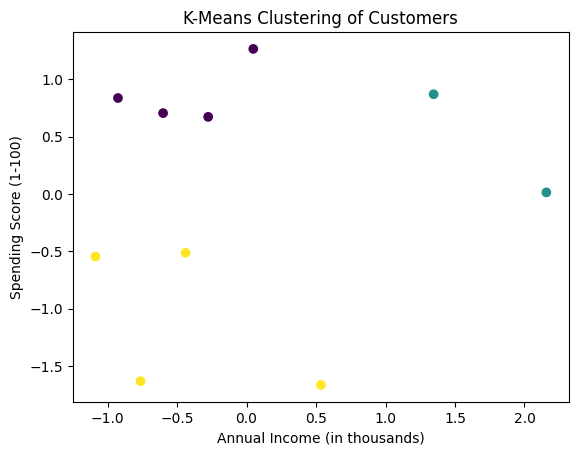

In [7]:
# Plot K-Means clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Visualize DBSCAN clusters:

**Similarly, visualize the clusters and outliers detected by DBSCAN.**

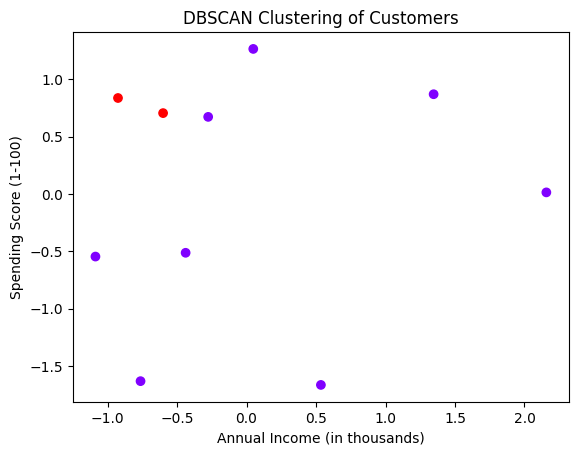

In [8]:
# Plot DBSCAN clusters
plt.scatter(df_scaled['AnnualIncome'], df_scaled['SpendingScore'], c=df_scaled['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Visualize PCA results:

**Finally, create a scatterplot to visualize the two principal components obtained from PCA.**

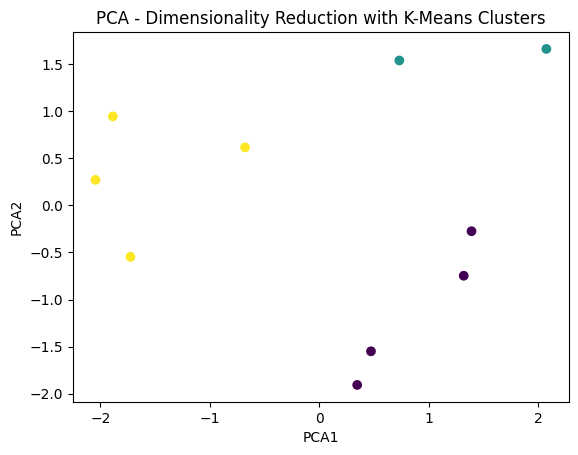

In [9]:
# Plot PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_scaled['KMeans_Cluster'], cmap='viridis')
plt.title('PCA - Dimensionality Reduction with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Step 9: Interpreting the results

**Now that you've visualized the results of each method, answer the following questions to interpret your findings:**

How well did k-means and DBSCAN cluster the data? Were there any significant differences in how they grouped customers?

Did DBSCAN identify any outliers? How does this impact the clustering results?

How did PCA help simplify the dataset? Did the principal components retain most of the variance?

Compare the cluster structures between the original feature space and the two-dimensional space produced by PCA. Do the clusters look similar?